In [1]:
import numpy as np
import pandas as pd
import math

df = pd.read_csv('Data/listings_Stockholm.csv')
pd.set_option('display.max_columns', None)

df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,75590,https://www.airbnb.com/rooms/75590,20220924142204,2022-09-24,city scrape,Amazing nature location by a lake,"Apartment on the top floor, overlooking a lake...","Expect a wonderful stay in beautiful scenery, ...",https://a0.muscache.com/pictures/7430cc80-7a4f...,397766,https://www.airbnb.com/users/show/397766,Peter,2011-02-18,"Stockholm, Sweden",Easy going and pragmatic when it comes to livi...,a few days or more,0%,0%,f,https://a0.muscache.com/im/users/397766/profil...,https://a0.muscache.com/im/users/397766/profil...,NaN,1,2,"['email', 'phone', 'work_email']",t,t,"Nacka, Stockholm County, Sweden",Skarpnäcks,NaN,59.301170,18.128330,Entire rental unit,Entire home/apt,3,NaN,1 bath,2.0,1.0,"[""Hair dryer"", ""Long term stays allowed"", ""Hea...",$949.00,30,100,30.0,30.0,100.0,100.0,30.0,100.0,NaN,t,28,58,88,178,2022-09-24,10,0,0,2013-08-02,2016-07-08,4.80,5.00,4.89,4.89,5.00,4.78,4.78,NaN,f,1,1,0,0,0.09
1,109193,https://www.airbnb.com/rooms/109193,20220924142204,2022-09-24,previous scrape,Live by the ocean,"""The place to stay when in Stockholm"" accordin...","If you love to be close to town, but not actua...",https://a0.muscache.com/pictures/d7f30f83-73b7...,564237,https://www.airbnb.com/users/show/564237,Lennart,2011-05-07,"Stockholm, Sweden",I'm a happy guy living in a dream location cal...,NaN,NaN,100%,f,https://a0.muscache.com/im/users/564237/profil...,https://a0.muscache.com/im/users/564237/profil...,NaN,1,1,"['email', 'phone', 'work_email']",t,t,"Nacka, Stockholm County, Sweden",Östermalms,NaN,59.316400,18.161120,Entire rental unit,Entire home/apt,5,NaN,1 bath,2.0,2.0,"[""Hair dryer"", ""Smoke alarm"", ""Refrigerator"", ...","$1,800.00",10,28,10.0,10.0,1125.0,1125.0,10.0,1125.0,NaN,t,0,0,0,0,2022-09-24,31,1,0,2012-01-04,2022-07-10,4.83,4.84,4.94,4.90,4.87,4.60,4.55,NaN,t,1,1,0,0,0.24
2,149587,https://www.airbnb.com/rooms/149587,20220924142204,2022-09-24,city scrape,Modern house 15min from city centre,<b>The space</b><br />This is a very modern ho...,NaN,https://a0.muscache.com/pictures/1005171/cb1de...,721536,https://www.airbnb.com/users/show/721536,Teymur,2011-06-20,"Stockholm, Sweden",I am married and have two children.,within an hour,100%,0%,f,https://a0.muscache.com/im/pictures/user/f03d0...,https://a0.muscache.com/im/pictures/user/f03d0...,NaN,1,1,"['email', 'phone', 'work_email']",t,f,NaN,Rinkeby-Tensta,NaN,59.402500,17.988280,Entire home,Entire home/apt,6,NaN,3 baths,4.0,4.0,"[""Hair dryer"", ""Dishes and silverware"", ""Long ...","$1,966.00",4,90,4.0,4.0,90.0,90.0,4.0,90.0,NaN,t,0,0,0,261,2022-09-24,10,0,0,2012-07-02,2019-08-20,5.00,4.80,4.70,4.89,4.90,4.78,4.78,NaN,f,1,1,0,0,0.08
3,164448,https://www.airbnb.

In [2]:
def isNaN(string):
    return string != string

def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False
    
def isint(num):
    try:
        int(num)
        return True
    except ValueError:
        return False

# Cleaning for the price column 

def cleaning(string_price):
    st = string_price.replace('$','')
    st = st.replace(',','')
    return float(st)

df["price"] = df["price"].apply(cleaning)


df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,75590,https://www.airbnb.com/rooms/75590,20220924142204,2022-09-24,city scrape,Amazing nature location by a lake,"Apartment on the top floor, overlooking a lake...","Expect a wonderful stay in beautiful scenery, ...",https://a0.muscache.com/pictures/7430cc80-7a4f...,397766,https://www.airbnb.com/users/show/397766,Peter,2011-02-18,"Stockholm, Sweden",Easy going and pragmatic when it comes to livi...,a few days or more,0%,0%,f,https://a0.muscache.com/im/users/397766/profil...,https://a0.muscache.com/im/users/397766/profil...,NaN,1,2,"['email', 'phone', 'work_email']",t,t,"Nacka, Stockholm County, Sweden",Skarpnäcks,NaN,59.301170,18.128330,Entire rental unit,Entire home/apt,3,NaN,1 bath,2.0,1.0,"[""Hair dryer"", ""Long term stays allowed"", ""Hea...",949.0,30,100,30.0,30.0,100.0,100.0,30.0,100.0,NaN,t,28,58,88,178,2022-09-24,10,0,0,2013-08-02,2016-07-08,4.80,5.00,4.89,4.89,5.00,4.78,4.78,NaN,f,1,1,0,0,0.09
1,109193,https://www.airbnb.com/rooms/109193,20220924142204,2022-09-24,previous scrape,Live by the ocean,"""The place to stay when in Stockholm"" accordin...","If you love to be close to town, but not actua...",https://a0.muscache.com/pictures/d7f30f83-73b7...,564237,https://www.airbnb.com/users/show/564237,Lennart,2011-05-07,"Stockholm, Sweden",I'm a happy guy living in a dream location cal...,NaN,NaN,100%,f,https://a0.muscache.com/im/users/564237/profil...,https://a0.muscache.com/im/users/564237/profil...,NaN,1,1,"['email', 'phone', 'work_email']",t,t,"Nacka, Stockholm County, Sweden",Östermalms,NaN,59.316400,18.161120,Entire rental unit,Entire home/apt,5,NaN,1 bath,2.0,2.0,"[""Hair dryer"", ""Smoke alarm"", ""Refrigerator"", ...",1800.0,10,28,10.0,10.0,1125.0,1125.0,10.0,1125.0,NaN,t,0,0,0,0,2022-09-24,31,1,0,2012-01-04,2022-07-10,4.83,4.84,4.94,4.90,4.87,4.60,4.55,NaN,t,1,1,0,0,0.24
2,149587,https://www.airbnb.com/rooms/149587,20220924142204,2022-09-24,city scrape,Modern house 15min from city centre,<b>The space</b><br />This is a very modern ho...,NaN,https://a0.muscache.com/pictures/1005171/cb1de...,721536,https://www.airbnb.com/users/show/721536,Teymur,2011-06-20,"Stockholm, Sweden",I am married and have two children.,within an hour,100%,0%,f,https://a0.muscache.com/im/pictures/user/f03d0...,https://a0.muscache.com/im/pictures/user/f03d0...,NaN,1,1,"['email', 'phone', 'work_email']",t,f,NaN,Rinkeby-Tensta,NaN,59.402500,17.988280,Entire home,Entire home/apt,6,NaN,3 baths,4.0,4.0,"[""Hair dryer"", ""Dishes and silverware"", ""Long ...",1966.0,4,90,4.0,4.0,90.0,90.0,4.0,90.0,NaN,t,0,0,0,261,2022-09-24,10,0,0,2012-07-02,2019-08-20,5.00,4.80,4.70,4.89,4.90,4.78,4.78,NaN,f,1,1,0,0,0.08
3,164448,https://www.airbnb.com/rooms/16

In [3]:
df.shape[0]

3990

In [4]:
def cleaningBedrooms(str_data):
    if(isNaN(str_data)):
        return 0.0
    elif(math.isinf(str_data)):
        return 0.0
    else:
        return float(str_data)
      
def cleaningBeds(str_data):
    if(isNaN(str_data)):
        return 0.0
    elif(math.isinf(str_data)):
        return 0.0
    else:
        return float(str_data)

df["bedrooms"] = df["bedrooms"].apply(cleaningBedrooms)
df["beds"] = df["beds"].apply(cleaningBeds)

df['neighbourhood_cleansed'].value_counts()

Södermalms                972
Östermalms                430
Norrmalms                 366
Kungsholmens              341
Bromma                    322
Hägersten-Liljeholmens    300
Enskede-Årsta-Vantörs     294
Skarpnäcks                237
Rinkeby-Tensta            182
Hässelby-Vällingby        139
Älvsjö                    124
Spånga-Tensta             114
Farsta                    110
Skärholmens                59
Name: neighbourhood_cleansed, dtype: int64

In [5]:
#df_type_room = df[df['room_type'] == 'Entire home/apt']
#df_type_room = df_type_room[df_type_room['accommodates'] == 2]
df_type_room = df

In [6]:
df_type_room['neighbourhood_cleansed'].value_counts()

Södermalms                972
Östermalms                430
Norrmalms                 366
Kungsholmens              341
Bromma                    322
Hägersten-Liljeholmens    300
Enskede-Årsta-Vantörs     294
Skarpnäcks                237
Rinkeby-Tensta            182
Hässelby-Vällingby        139
Älvsjö                    124
Spånga-Tensta             114
Farsta                    110
Skärholmens                59
Name: neighbourhood_cleansed, dtype: int64

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

data = np.array(list(df_type_room[['latitude', 'longitude', 'price']].apply(tuple, axis=1)))

#data = np.vstack((data, [59.28159,17.98761, 30000]))
#data = np.vstack((data, [59.28159,17.98111, 30000]))
#data = np.vstack((data, [59.28305,17.98591, 30000]))
#data = np.vstack((data, [59.28601,17.98611, 30000]))
#data = np.vstack((data, [59.28540,17.98111, 28000]))
#data = np.vstack((data, [59.28402,17.98301, 32000]))
#data = np.vstack((data, [59.28159,17.98111, 30000]))
#data = np.vstack((data, [59.28172,17.97221, 40000]))
#data = np.vstack((data, [59.28109,17.98111, 30000]))



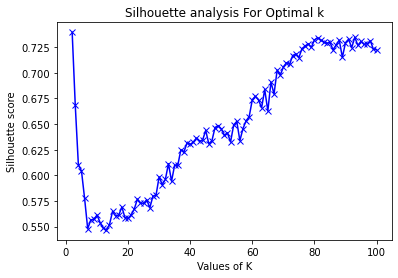

In [8]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters).fit(data)
    # silhouette score
    silhouette_avg.append(silhouette_score(data, kmeans.labels_))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
    

plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [9]:
silhouette_avg

[0.7395065379897418,
 0.6681155043095587,
 0.6101220451056844,
 0.604248794854115,
 0.5775828703016641,
 0.5479460260133018,
 0.5565454262344373,
 0.5570168389237601,
 0.5613426573431626,
 0.5538727374898861,
 0.5485484033578555,
 0.5467768902341505,
 0.5517603021968426,
 0.5647671000233565,
 0.5603119883827841,
 0.5611783290255223,
 0.5690589792412984,
 0.5587618973033318,
 0.5579692502338367,
 0.5614627321604945,
 0.5671432728547674,
 0.5768691335546781,
 0.572985320779828,
 0.5725505234164414,
 0.5763073327438705,
 0.5682963848291591,
 0.5796783810090949,
 0.5805253196829259,
 0.598576818721191,
 0.5909197624772641,
 0.5959417995076921,
 0.6113177783967977,
 0.5942820578479702,
 0.6100131773409415,
 0.6096694428791096,
 0.6249303834335296,
 0.6228638384565962,
 0.6317312765563429,
 0.6302549896613832,
 0.632038305379523,
 0.6363962313944727,
 0.633131034654774,
 0.6344220346400524,
 0.6437332081392529,
 0.6306786588762937,
 0.6337828526444763,
 0.6466308839347904,
 0.648513297281675

In [10]:
#kmeans = KMeans(n_clusters=3)
#label = kmeans.fit_predict(df[['latitude', 'longitude']])
#label

kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

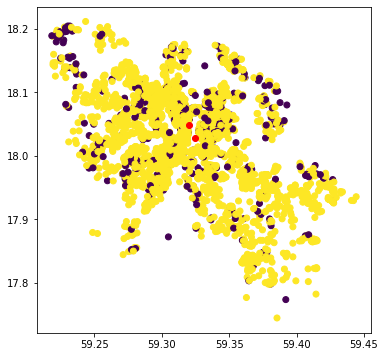

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6)) 
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data[:,0],data[:,1], c = kmeans.labels_)
fig.canvas.draw()

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')

fig.canvas.draw()

In [12]:
np.set_printoptions(threshold=df_type_room.shape[0])
kmeans.labels_


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
np.count_nonzero(kmeans.labels_ == 1)

3510

In [14]:
indices = [i for i in range(len(kmeans.labels_)) if kmeans.labels_[i]==1] 

In [15]:
indices

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 8,
 9,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 23,
 24,
 25,
 26,
 28,
 29,
 30,
 31,
 33,
 34,
 35,
 36,
 37,
 38,
 40,
 42,
 43,
 44,
 45,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 57,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 76,
 77,
 79,
 80,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 94,
 96,
 97,
 98,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 117,
 118,
 119,
 121,
 122,
 123,
 124,
 126,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 153,
 154,
 155,
 156,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 169,
 170,
 171,
 173,
 174,
 175,
 176,
 177,
 179,
 180,
 181,
 183,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 208,
 209,
 212,
 213,
 215,
 218,
 21

In [16]:
df_type_room.iloc[[1655]]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1655,35277846,https://www.airbnb.com/rooms/35277846,20220924142204,2022-09-24,previous scrape,Cosy apartment in central location,Cosy apartment located at Kungsholmen about 15...,Close to green areas and the sea. A cute place...,https://a0.muscache.com/pictures/29fadfd1-c44b...,1385176,https://www.airbnb.com/users/show/1385176,Linnéa,2011-11-08,"Stockholm, Sweden",Account Manager and Yoga Teacher. Lives and wo...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/3af2a...,https://a0.muscache.com/im/pictures/user/3af2a...,NaN,1,1,"['email', 'phone']",t,f,"Kungsholmen, Stockholms län, Sweden",Kungsholmens,NaN,59.33199,18.01436,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Hair dryer"", ""Dishes and silverware"", ""Heati...",1150.0,2,3,2.0,2.0,3.0,3.0,2.0,3.0,NaN,t,0,0,0,0,2022-09-24,4,0,0,2019-09-14,2019-12-01,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,f,1,1,0,0,0.11


In [17]:
df_type_room.iloc[[806]]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
806,17557432,https://www.airbnb.com/rooms/17557432,20220924142204,2022-09-24,city scrape,"Seaview apartment, close to metro and city","With an awesome seaview of Ulvsundasjö, my apa...",NaN,https://a0.muscache.com/pictures/5f76e090-d52e...,109378926,https://www.airbnb.com/users/show/109378926,Siyun,2017-01-01,"Stockholm, Sweden",I'm working as project manager in telecom indu...,within a day,100%,78%,f,https://a0.muscache.com/im/pictures/user/1864a...,https://a0.muscache.com/im/pictures/user/1864a...,NaN,1,2,"['email', 'phone']",t,t,NaN,Bromma,NaN,59.34658,17.99817,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Hair dryer"", ""Refrigerator"", ""Toaster"", ""Bed...",1000.0,4,30,4.0,4.0,30.0,30.0,4.0,30.0,NaN,t,21,51,81,81,2022-09-24,6,3,1,2017-03-28,2022-09-05,4.83,5.0,4.67,5.0,5.0,5.0,4.83,NaN,f,1,1,0,0,0.09


In [18]:
df_type_room.iloc[[291]]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
291,5757636,https://www.airbnb.com/rooms/5757636,20220924142204,2022-09-24,city scrape,"Heart of Stockholm, nice view",View over lake Riddarfjärden and Rålambshov's ...,NaN,https://a0.muscache.com/pictures/79299791/19e0...,27209433,https://www.airbnb.com/users/show/27209433,Mats,2015-02-04,"Stockholm, Sweden",NaN,within a day,100%,75%,f,https://a0.muscache.com/im/users/27209433/prof...,https://a0.muscache.com/im/users/27209433/prof...,Kungsholmen,1,1,"['email', 'phone']",t,f,NaN,Kungsholmens,NaN,59.32963,18.02948,Entire rental unit,Entire home/apt,4,NaN,1.5 baths,2.0,4.0,"[""Heating"", ""Dryer"", ""TV with standard cable"",...",1800.0,6,21,6.0,6.0,21.0,21.0,6.0,21.0,NaN,t,1,1,1,70,2022-09-24,9,2,0,2015-07-14,2022-07-17,5.0,5.0,5.0,4.89,4.89,5.0,5.0,NaN,f,1,1,0,0,0.1


In [19]:
df_type_room.iloc[[810]]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
810,17732905,https://www.airbnb.com/rooms/17732905,20220924142204,2022-09-24,city scrape,Spacious house with panoramic view of Lake Mäl...,Spacious 8-bed house with panoramic view over ...,NaN,https://a0.muscache.com/pictures/e594818d-1850...,13642609,https://www.airbnb.com/users/show/13642609,Helena,2015-06-24,"Stockholm, Sweden",NaN,NaN,NaN,80%,f,https://a0.muscache.com/im/pictures/user/9a2e4...,https://a0.muscache.com/im/pictures/user/9a2e4...,Hägersten-Liljeholmen,1,1,"['email', 'phone']",t,t,NaN,Hägersten-Liljeholmens,NaN,59.30135,17.94566,Entire home,Entire home/apt,8,NaN,2 baths,4.0,5.0,"[""Hair dryer"", ""Refrigerator"", ""Bed linens"", ""...",3990.0,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,0,9,9,31,2022-09-24,22,5,0,2017-05-22,2022-08-12,4.85,4.8,4.85,4.95,4.85,4.85,4.45,NaN,f,1,1,0,0,0.34


In [20]:
df_type_room.iloc[[1013]]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1013,21793613,https://www.airbnb.com/rooms/21793613,20220924142204,2022-09-24,city scrape,Top Location Apartment,Please take your time to read all the informat...,The apartment has self check in with flexible ...,https://a0.muscache.com/pictures/492d75c0-5285...,158816263,https://www.airbnb.com/users/show/158816263,Kerstin,2017-11-15,"Stockholm, Sweden",NaN,within an hour,100%,99%,f,https://a0.muscache.com/im/pictures/user/5593c...,https://a0.muscache.com/im/pictures/user/5593c...,Södermalm,2,2,"['email', 'phone']",t,t,"Södermalm, Stockholms län, Sweden",Södermalms,NaN,59.32338,18.0716,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Hair dryer"", ""Refrigerator"", ""Bed linens"", ""...",1519.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,8,36,64,336,2022-09-24,378,87,4,2017-12-10,2022-09-09,4.69,4.74,4.79,4.83,4.53,4.93,4.59,NaN,f,2,2,0,0,6.48
